---

<img src="images/anchormen-logo.png" width="500">

---

#  ITVitae introduction demo (Machine Learning BASICS)

Now it's your turn! Follow the exercises below, if you are not sure what to do look back at the informative notebook. For the exercises you are allowed to import machine learning algorithms from the scikit-learn module (you do not have to code them yourself).

## A. Dataset and Problem

The data you will use for this exercise is the Wisconsin Breast Cancer dataset, this dataset contains clinical measurements of breast cancer tumors. Each tumor is labeled as either "benign" or "malignant". The task is to learn to predict whether a tumor is malignant based on the measurement of the tissue.

In [1]:
# Important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Load the (csv) datafile called cancer_data.csv in a pandas DataFrame. The file can be found in the `data` directory of this repository.

In [2]:
df_cancer = pd.read_csv('cancer_data.csv', index_col="id")

## B. Data Exploration

**Now look at the first rows of the dataset and inspect if everything looks right. Which column contains the label variable?**

In [3]:
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


Probably you noticed that there is an unexpected column named "Unnamed: 32", this column should not be contained in the dataframe as it is definitely not a feature of tissue measurement. 

**Remove the unnecessary column**

In [4]:
df_cancer.drop('Unnamed: 32', axis=1, inplace=True)
df_cancer.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
id,,,,,,,,,,,,,,,,,,,,,
842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Although this dataset has a lot of features a good way to explore the data is to visualize some of them.

**Explore the data visually using scatterplots and/or histograms.**

Hint: Use the `pairplot` method in Seaborn to create scatterplots of multiple variables at once. You can use the `hue` parameter to color points by label (benign, malignant).

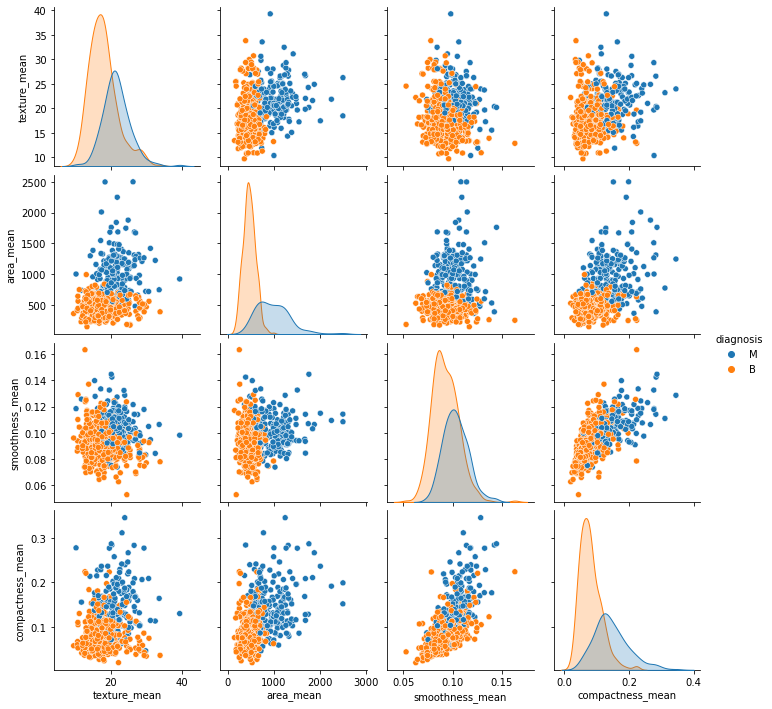

In [5]:
sns.pairplot(df_cancer[['diagnosis', 'texture_mean', 'area_mean', 'smoothness_mean', 'compactness_mean']], 
             hue='diagnosis', diag_kind='kde');

## C. Preprocessing

Recall that we want to predict the diagnosis based on measurement of the tissue. From the data we can see that the second column contains the diagnosis label. And all columns after the diagnosis column refer to the features from which we would like to predict the diagnosis. 

**Exercise: From the dataframe pull the `X` matrix, which refers to the features and the `y` vector which refers to the target. **

In [6]:
X = df_cancer.drop('diagnosis', axis=1)
y = df_cancer['diagnosis']

**Exercise: Split the target and feature variables into a training set and a test set. Set the proportion of the dataset to include in the test set to 0.4** 

In [7]:
from sklearn.model_selection  import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=1234)

## D. Prediction Model

Now we want to apply a Logistic Regression model to our dataset. As Logistic Regression is a linear classification algorithm, it is implemented in the linear_model module of scikit-learn. 

**Exercise: Initialize a Logistic Regression model**

In [8]:
from sklearn.linear_model import LogisticRegression 
logreg = LogisticRegression(solver='lbfgs', max_iter=10000)

Now we want to train the model on the training set, using the fit method of the logreg object which you just initialized. 

**Exercise: Train the model on the training set**

In [9]:
logreg.fit(X_train, y_train)

LogisticRegression(max_iter=10000)

**Exercise: Get the model's test score as well as the training score**

In [11]:
print("Training set score: {:.3f}".format(logreg.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg.score(X_test, y_test)))

# OR something like:
# y_predict = logreg.predict(X_test)
# print ("Test set score: {:.3f}".format(np.mean(y_predict == y_test)))

Training set score: 0.968
Test set score: 0.947


## E. Setting Parameters

Logistic Regression applies a so called L2 regularization. For Logistic Regression, C is the parameter that determines the strenght of the regularization. Higher values of C correpond to less regularization, meaning that it tries to fit the training set as best as possible (more complex model), while with low values of C the model puts more emphasis on finding a coefficient vector (`w`) that is close to zero (simpler model with less predictor variables). 

The Logistic Regression we applied above used the default value of C=1. Different values of C might result in a better accuracy of the model. 

Although the details on this regularization constrain will be discussed in detail later in the course, for now we will have a look at the results of the model with different values of C. First let's try to fit a more complex model by increasing the C parameter: 

**Exercise: Initialize and train a Logistic Regression model with the C-parameter set to 10. Print the training and the test score of the model.**

In [12]:
logreg10 = LogisticRegression(C=10, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg10.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg10.score(X_test, y_test)))

Training set score: 0.974
Test set score: 0.943


Now try to see what happend when you use an even more regularized model as the default of C=1.

**Exercise: Initialize and train a Logistic Regression model with the C-parameter set to 0.1. Print the training and the test score of the model.**

In [13]:
logreg01 = LogisticRegression(C=0.1, solver='lbfgs', max_iter=10000).fit(X_train, y_train)
print("Training set score: {:.3f}".format(logreg01.score(X_train, y_train)))
print("Test set score: {:.3f}".format(logreg01.score(X_test, y_test)))

Training set score: 0.956
Test set score: 0.939


## Extra: Naive Bayes as alternative prediction model

In [13]:
from sklearn.naive_bayes import GaussianNB
naivebayes = GaussianNB().fit(X_train, y_train)

print("Training set score: {:.3f}".format(naivebayes.score(X_train, y_train)))
print("Test set score: {:.3f}".format(naivebayes.score(X_test, y_test)))

Training set score: 0.962
Test set score: 0.908
